Gerando Performance geral de cada modelo

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [ ]:
diretorio = "Diretório com Tabelas de Acerto Todas as IAs"
familias_ja_visitadas = set()
dataframes = []
for file in os.listdir(diretorio):
    inicio_extensao_csv = file.find(".csv")
    inicio_nome_familia = 22
    nome_familia = file[inicio_nome_familia:inicio_extensao_csv]
    if nome_familia in familias_ja_visitadas:
        continue
    familias_ja_visitadas.add(nome_familia)
    dataframe_geral = pd.read_csv(os.path.join(diretorio, file))
    for outraFile in os.listdir(diretorio):
        if file == outraFile:
            continue
        inicio_outra_extensao_csv = outraFile.find(".csv")
        inicio_outro_nome_familia = 22
        outro_nome_familia = outraFile[inicio_outro_nome_familia:inicio_outra_extensao_csv]
        if nome_familia == outro_nome_familia:
            novo_df = pd.read_csv(os.path.join(diretorio, outraFile))
            dataframe_geral = pd.concat([dataframe_geral, novo_df], ignore_index=True)
    dataframe_completo_agrupado = dataframe_geral.groupby("model_name").sum().reset_index()
    dataframe_completo_agrupado["Aproveitamento"] = dataframe_completo_agrupado["is_correct"] / 400
    print(f"Dataframe completo agrupado para {nome_familia}:\n\n")
    dataframes.append(dataframe_completo_agrupado)
    print("----------------------\n\n")

Dataframe completo agrupado para  PHI:


----------------------


Dataframe completo agrupado para  Sabia:


----------------------


Dataframe completo agrupado para  Mistral:


----------------------


Dataframe completo agrupado para  DeepSeek:


----------------------


Dataframe completo agrupado para  Llema:


----------------------


Dataframe completo agrupado para  Vicuna:


----------------------


Dataframe completo agrupado para  Orca:


----------------------


Dataframe completo agrupado para  DeepSeek V3 (Moderno):


----------------------


Dataframe completo agrupado para  NuminaMath:


----------------------


Dataframe completo agrupado para  Yi:


----------------------


Dataframe completo agrupado para  Falcon2:


----------------------


Dataframe completo agrupado para  Falcon3:


----------------------


Dataframe completo agrupado para  Bloom:


----------------------


Dataframe completo agrupado para  Falcon:


----------------------


Dataframe completo agr

gerando dataframe geral e gráficos

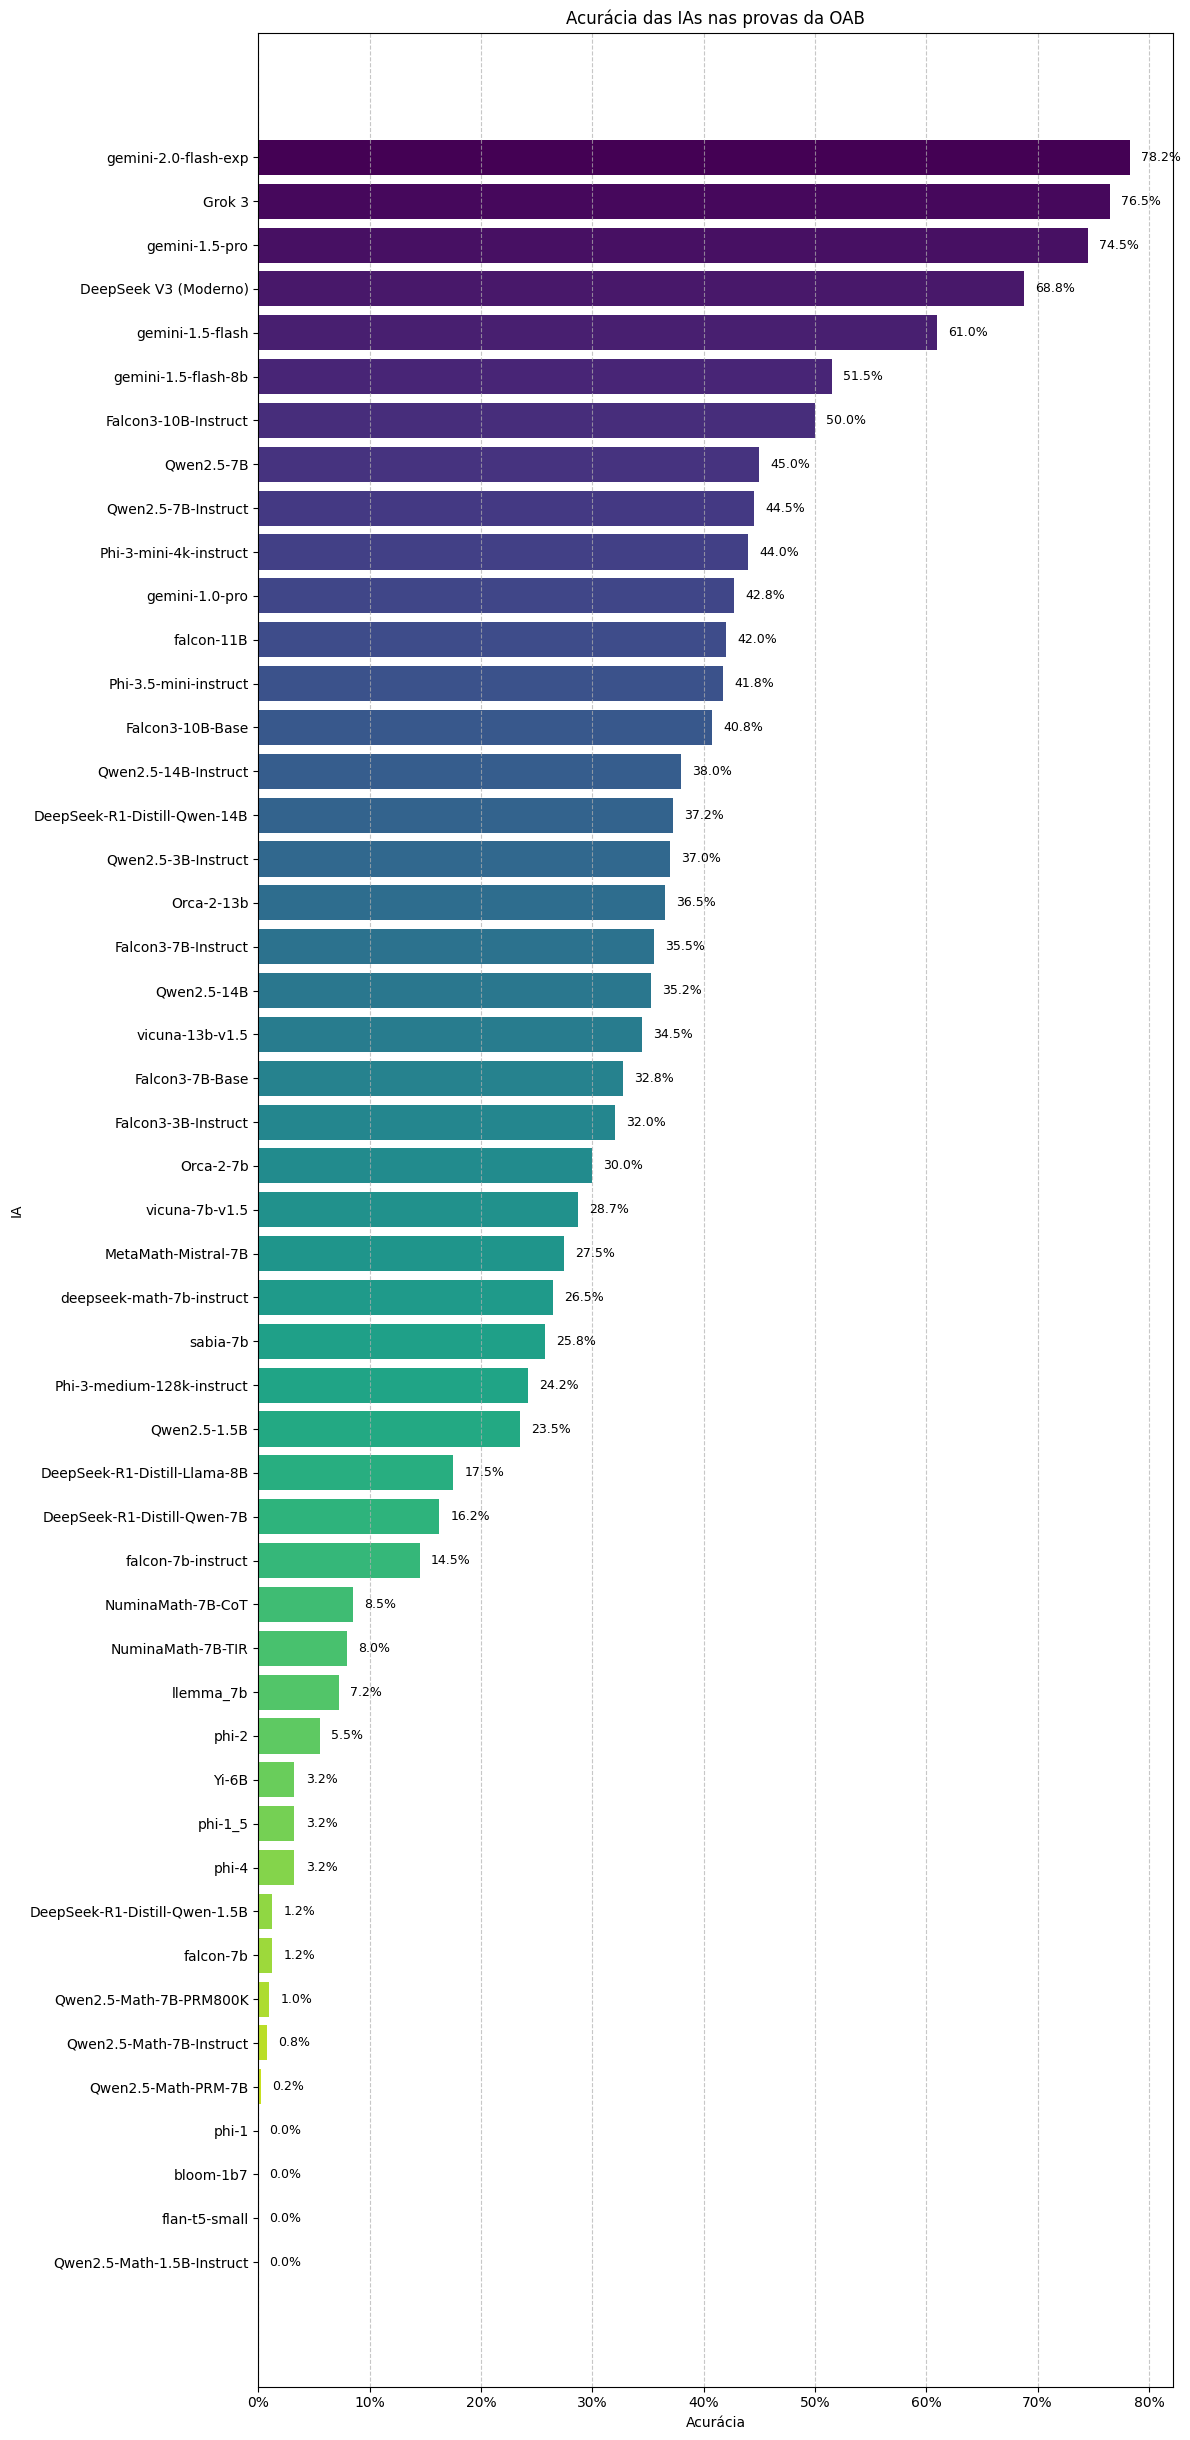

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.ticker as mtick

# Junta os DataFrames e ordena
df_completo = pd.concat(dataframes, ignore_index=True)
df_completo = df_completo.sort_values(by="Aproveitamento", ascending=False)

# Cores e tamanho
num_cores = len(df_completo)
colors = cm.viridis(np.linspace(0, 1, num_cores))
altura = 0.5 * len(df_completo)
plt.figure(figsize=(12, altura))

# Gráfico de barras
plt.barh(df_completo["model_name"], df_completo["Aproveitamento"], color=colors)

# Eixos e título
plt.xlabel("Acurácia")
plt.ylabel("IA")
plt.title("Acurácia das IAs nas provas da OAB")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Formatar eixo X como porcentagem
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Adicionar valores ao lado das barras
for i, (acuracia, nome) in enumerate(zip(df_completo["Aproveitamento"], df_completo["model_name"])):
    plt.text(acuracia + 0.01, i, f"{acuracia:.1%}", va='center', fontsize=9)

plt.tight_layout()
plt.show()
